In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

from sklearn.cluster import KMeans, k_means

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# import sys
# !conda list Check the packages installed

#### LOAD DATASET

In [5]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################

# IMPORT DATASET
SQL_Query = pd.read_csv("Gattex_11KRows_001.txt", sep='\t')

# RENAME COLUMNS
SQL_Query.columns =['Patient_Id', 'Diagnosis_Code', 'Practitioner_Id', 'Claim_Id', 'Practitioner_Role_Code',
              'Service_Date', 'Npi', 'Specialty_Code', 'Specialty_Description', 'Zip',
               'Medical_Account_Zip_Code', 'Patient_Birth_Year', 'Patient_Gender', 'Patient_Zip3']

# print the shape
print(SQL_Query.shape)

#runs the first 5 rows
SQL_Query.head()

(11586, 14)


Patient_Id Diagnosis_Code  Practitioner_Id           Claim_Id  \
0   181957945         R53.83           247001   5987150032168079   
1  1720381053          E11.9           695001  59726700032212515   
2  1720381053          Z79.4           695001  59726700032212515   
3  1720381053          J44.9           695001  59726700032212515   
4   485875687         Z12.31         13747001   3458810032215019   

  Practitioner_Role_Code Service_Date         Npi Specialty_Code  \
0                    RND   2021-07-23  1730246463             RO   
1                    ATG   2021-07-12  1295848570             FM   
2                    ATG   2021-07-12  1295848570             FM   
3                    ATG   2021-07-12  1295848570             FM   
4                    ATG   2021-07-20  1215967955             FM   

  Specialty_Description    Zip  Medical_Account_Zip_Code  Patient_Birth_Year  \
0    RADIOLOGY ONCOLOGY  67530                       NaN                1967   
1       FAMILY MEDICINE  49837                     498.0                1956   
2       FAMILY MEDICINE  49837                     498.0                1956   
3       FAMILY MEDICINE  49837                     498.0                1956   
4       FAMILY MEDICINE   1915                       1.0                1949   

   Patient_Gender  Patient_Zip3  
0               1         675.0  
1               2         498.0  
2               2         498.0  
3               2         498.0  
4               2          19.0

In [6]:
# Checking for null values
SQL_Query.isnull().sum()

Patient_Id                    0
Diagnosis_Code                0
Practitioner_Id               0
Claim_Id                      0
Practitioner_Role_Code        5
Service_Date                  0
Npi                           0
Specialty_Code                0
Specialty_Description         0
Zip                           0
Medical_Account_Zip_Code    262
Patient_Birth_Year            0
Patient_Gender                0
Patient_Zip3                204
dtype: int64

In [7]:
# Visualize the NULL observations
SQL_Query[SQL_Query['Practitioner_Role_Code'].isnull()]

Patient_Id Diagnosis_Code  Practitioner_Id           Claim_Id  \
5555    120106859          K25.5         36461001  59752000032353582   
11154   229085913         Z12.12           569001  59751800032499713   
11155   229085913        Z01.419           569001  59751800032499713   
11583   229085913         Z12.12           569001  59751800032499713   
11584   229085913        Z01.419           569001  59751800032499713   

      Practitioner_Role_Code Service_Date         Npi Specialty_Code  \
5555                     NaN   2021-07-19  1942414511            CCS   
11154                    NaN   2021-07-06  1407960586            OBG   
11155                    NaN   2021-07-06  1407960586            OBG   
11583                    NaN   2021-07-06  1407960586            OBG   
11584                    NaN   2021-07-06  1407960586            OBG   

           Specialty_Description    Zip  Medical_Account_Zip_Code  \
5555       CRITICAL CARE SURGERY  10467                     115.0   
11154  OBSTETRICS AND GYNECOLOGY  23229                     232.0   
11155  OBSTETRICS AND GYNECOLOGY  23229                     232.0   
11583  OBSTETRICS AND GYNECOLOGY  23229                     232.0   
11584  OBSTETRICS AND GYNECOLOGY  23229                     232.0   

       Patient_Birth_Year  Patient_Gender  Patient_Zip3  
5555                 1950               2         107.0  
11154                1972               2         232.0  
11155                1972               2         232.0  
11583                1972               2         232.0  
11584                1972               2         232.0

In [8]:
SQL_Query['Practitioner_Role_Code'] = SQL_Query['Practitioner_Role_Code'].fillna(SQL_Query['Practitioner_Role_Code'].mode()[0])

In [9]:
SQL_Query['Medical_Account_Zip_Code'] = SQL_Query['Medical_Account_Zip_Code'].fillna(SQL_Query['Medical_Account_Zip_Code'].mode()[0])

In [10]:
SQL_Query['Patient_Zip3'] = SQL_Query['Patient_Zip3'].fillna(SQL_Query['Patient_Zip3'].mode()[0])

In [11]:
# Deleting the NULL values
#SQL_Query = SQL_Query.dropna(subset = ['total_household_income'])

# Printing the shape
print(SQL_Query.shape)

# Visualize the NULL observations
SQL_Query.isnull().sum()

(11586, 14)


Patient_Id                  0
Diagnosis_Code              0
Practitioner_Id             0
Claim_Id                    0
Practitioner_Role_Code      0
Service_Date                0
Npi                         0
Specialty_Code              0
Specialty_Description       0
Zip                         0
Medical_Account_Zip_Code    0
Patient_Birth_Year          0
Patient_Gender              0
Patient_Zip3                0
dtype: int64

In [12]:
# Investigate all the elements whithin each Feature 
for column in SQL_Query:
    unique_vals = np.unique(SQL_Query[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values <10 for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values >10 for feature {} :{}'.format(column, nr_values))

The number of values >10 for feature Patient_Id :676
The number of values >10 for feature Diagnosis_Code :993
The number of values >10 for feature Practitioner_Id :300
The number of values >10 for feature Claim_Id :1018
The number of values <10 for feature Practitioner_Role_Code :4 -- ['ATG' 'ORD' 'RND' 'UNK']
The number of values >10 for feature Service_Date :31
The number of values >10 for feature Npi :300
The number of values >10 for feature Specialty_Code :64
The number of values >10 for feature Specialty_Description :64
The number of values >10 for feature Zip :281
The number of values >10 for feature Medical_Account_Zip_Code :230
The number of values >10 for feature Patient_Birth_Year :81
The number of values <10 for feature Patient_Gender :2 -- [1 2]
The number of values >10 for feature Patient_Zip3 :286


In [13]:
# Getting the columns we need
SQL_Query.columns

Index(['Patient_Id', 'Diagnosis_Code', 'Practitioner_Id', 'Claim_Id',
       'Practitioner_Role_Code', 'Service_Date', 'Npi', 'Specialty_Code',
       'Specialty_Description', 'Zip', 'Medical_Account_Zip_Code',
       'Patient_Birth_Year', 'Patient_Gender', 'Patient_Zip3'],
      dtype='object')

In [14]:
SQL_Query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586 entries, 0 to 11585
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_Id                11586 non-null  int64  
 1   Diagnosis_Code            11586 non-null  object 
 2   Practitioner_Id           11586 non-null  int64  
 3   Claim_Id                  11586 non-null  int64  
 4   Practitioner_Role_Code    11586 non-null  object 
 5   Service_Date              11586 non-null  object 
 6   Npi                       11586 non-null  int64  
 7   Specialty_Code            11586 non-null  object 
 8   Specialty_Description     11586 non-null  object 
 9   Zip                       11586 non-null  int64  
 10  Medical_Account_Zip_Code  11586 non-null  float64
 11  Patient_Birth_Year        11586 non-null  int64  
 12  Patient_Gender            11586 non-null  int64  
 13  Patient_Zip3              11586 non-null  float64
dtypes: flo

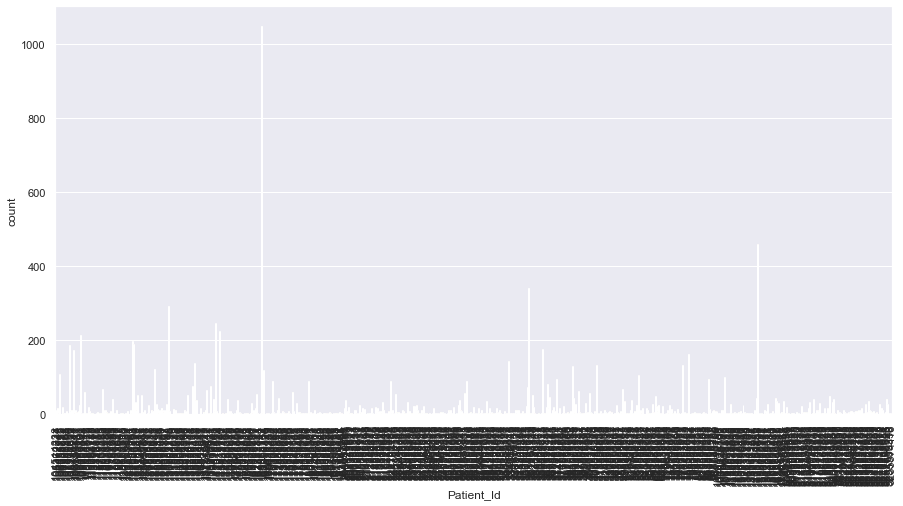

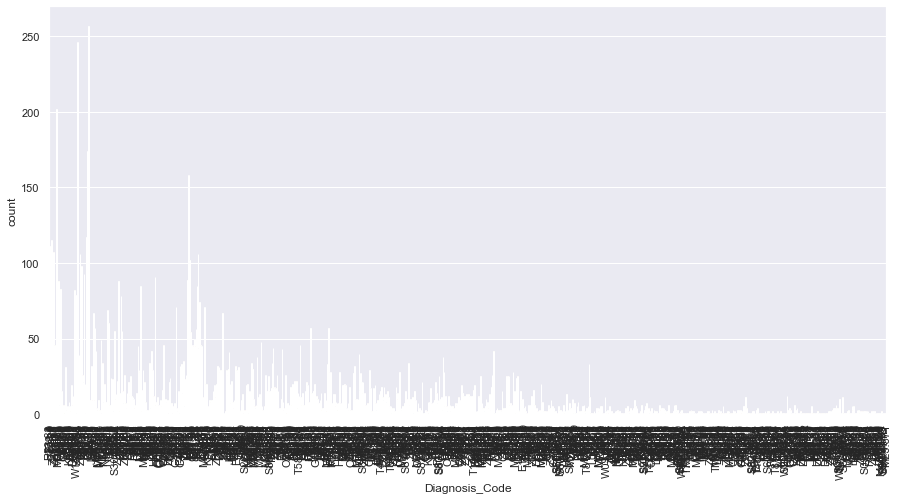

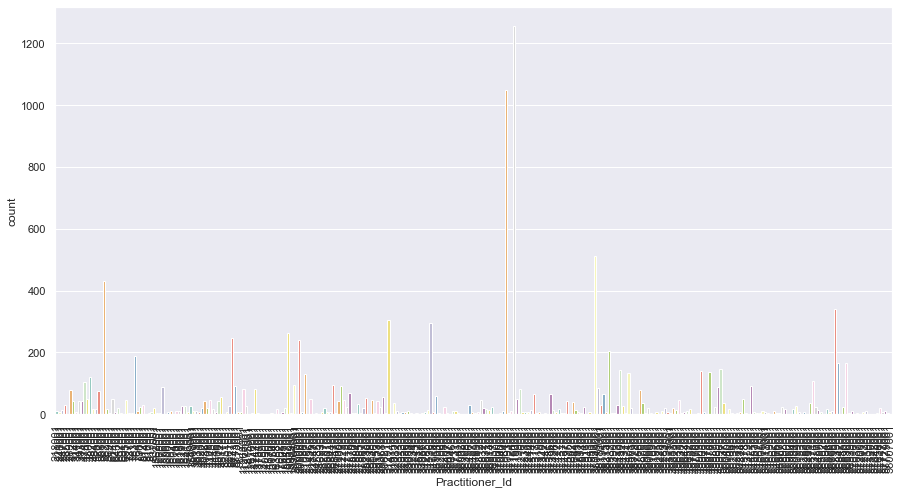

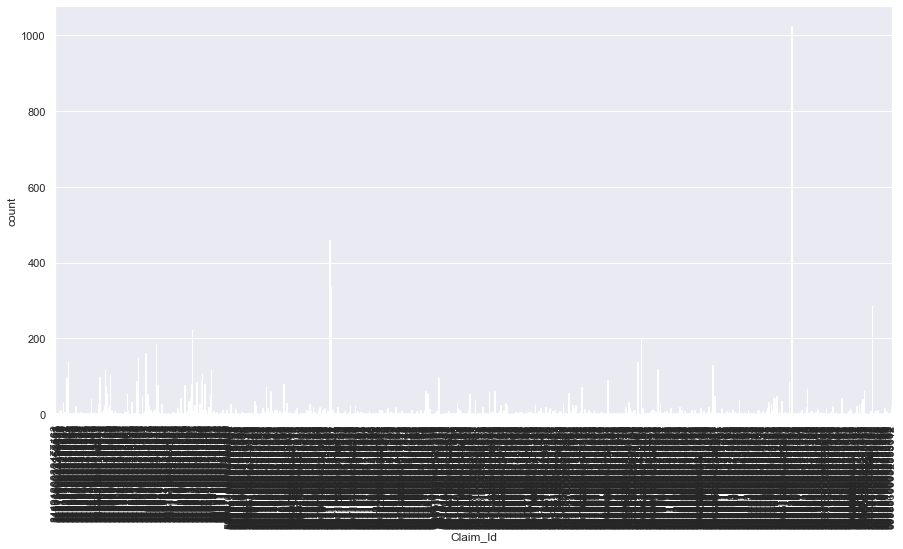

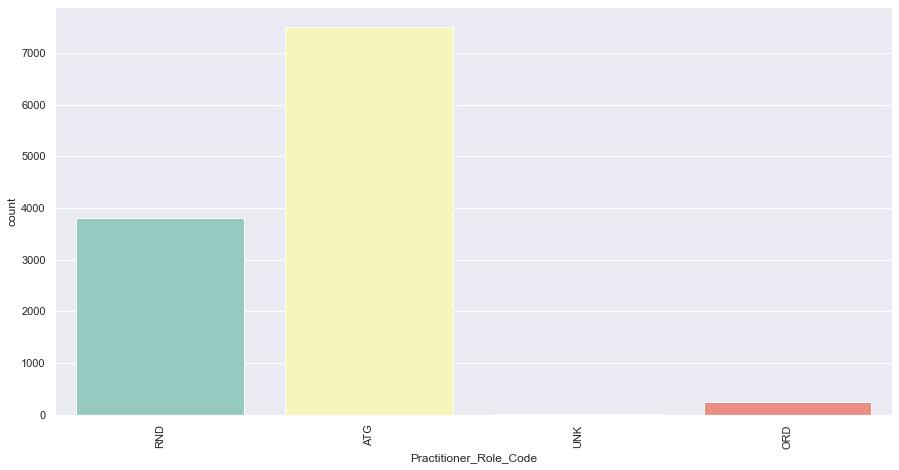

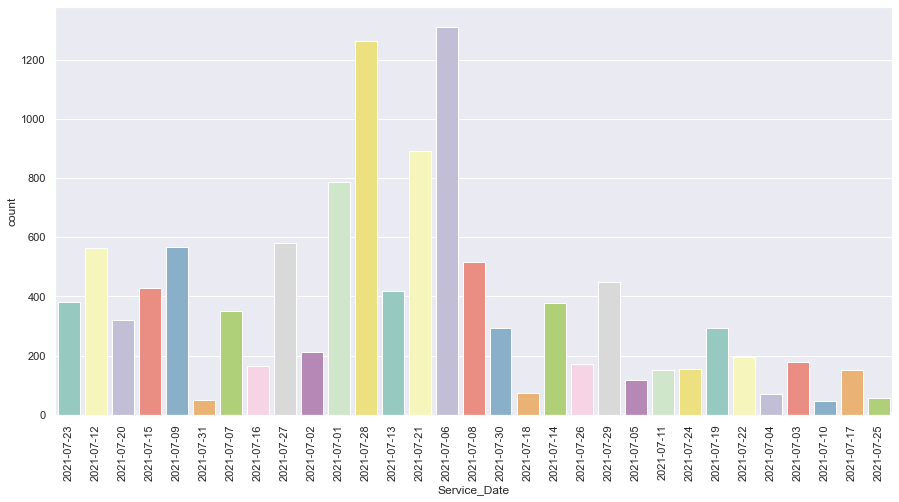

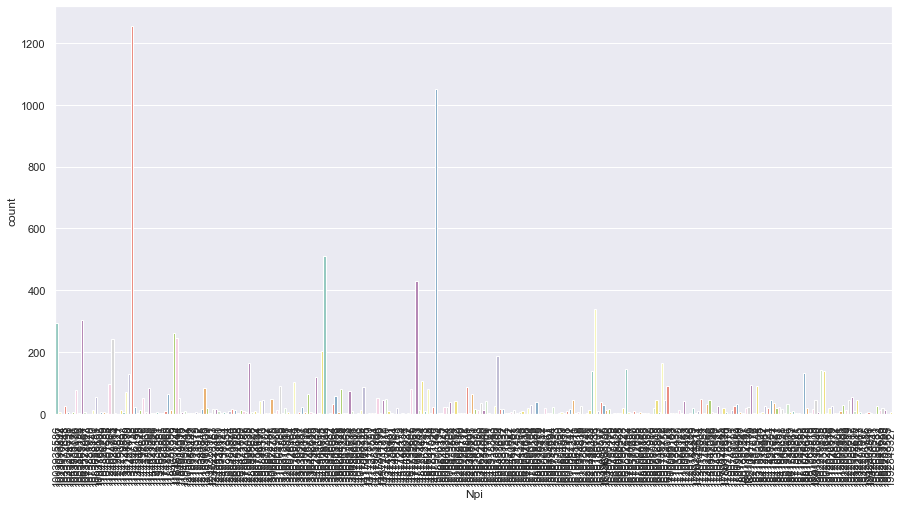

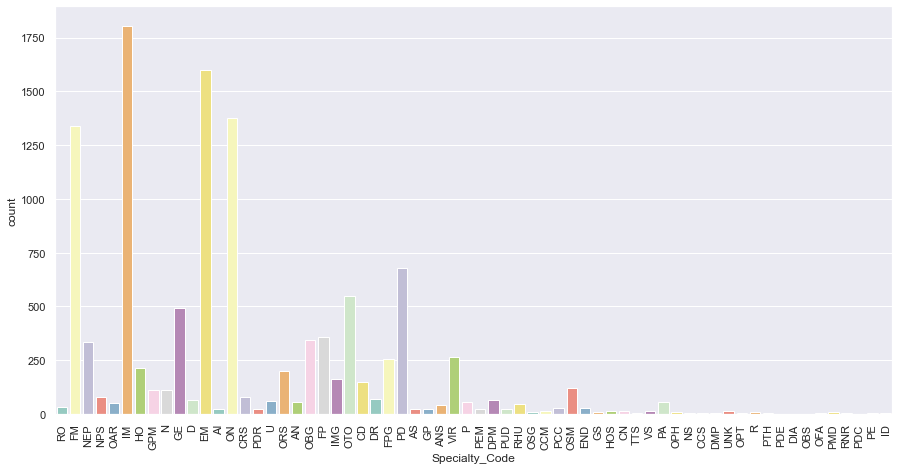

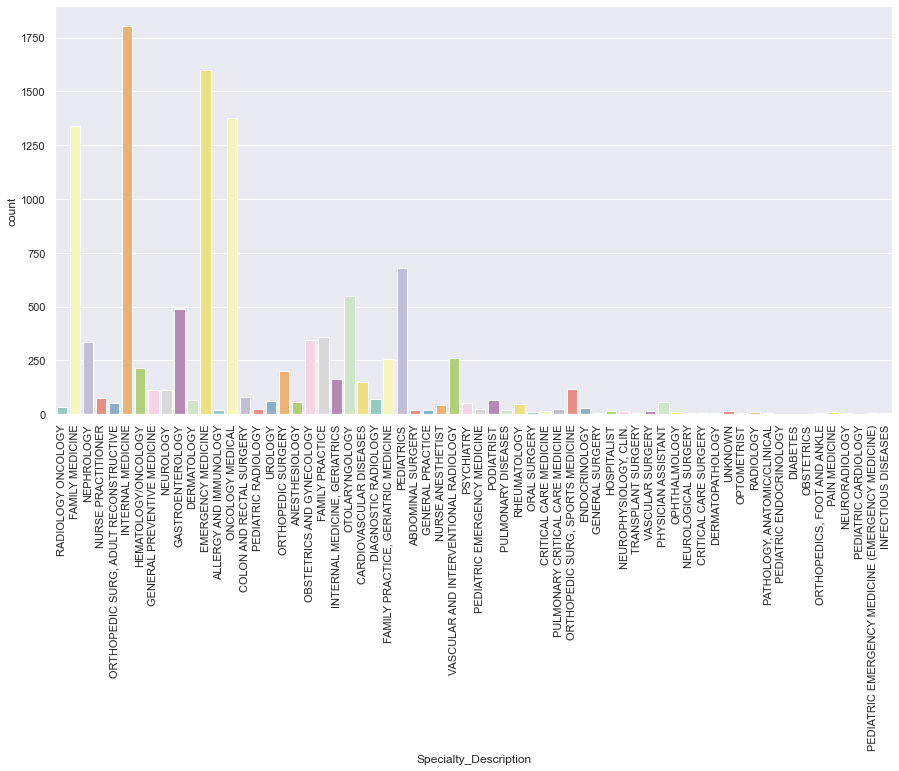

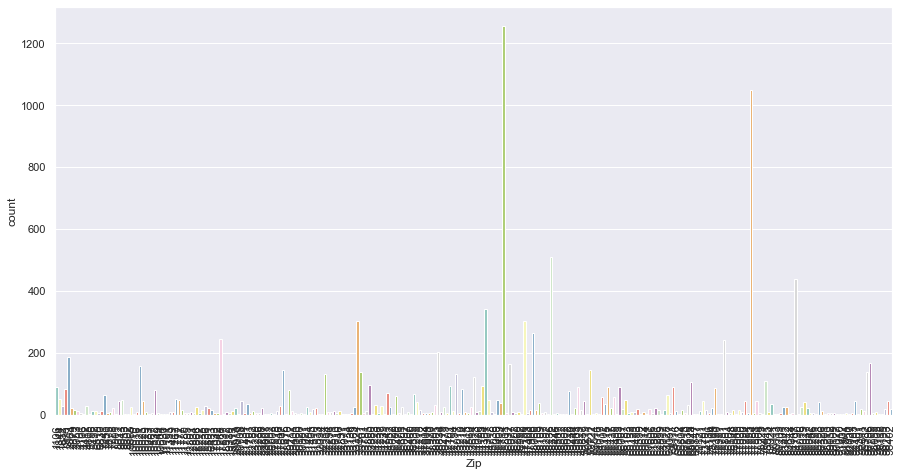

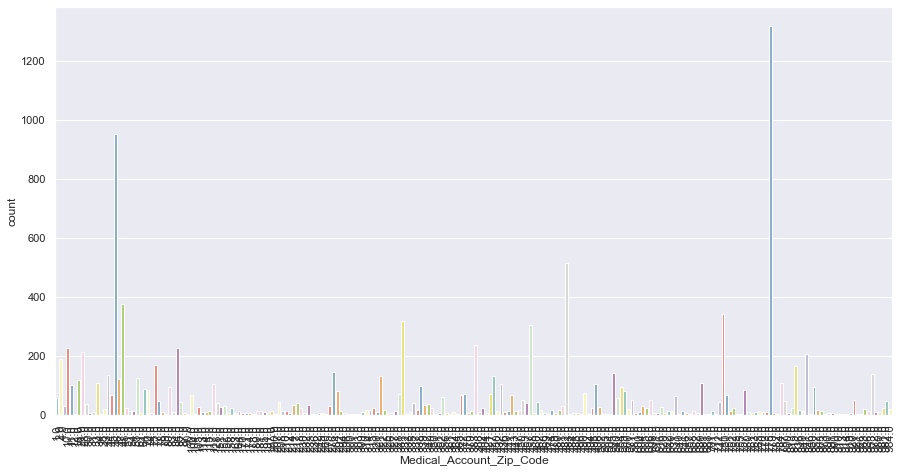

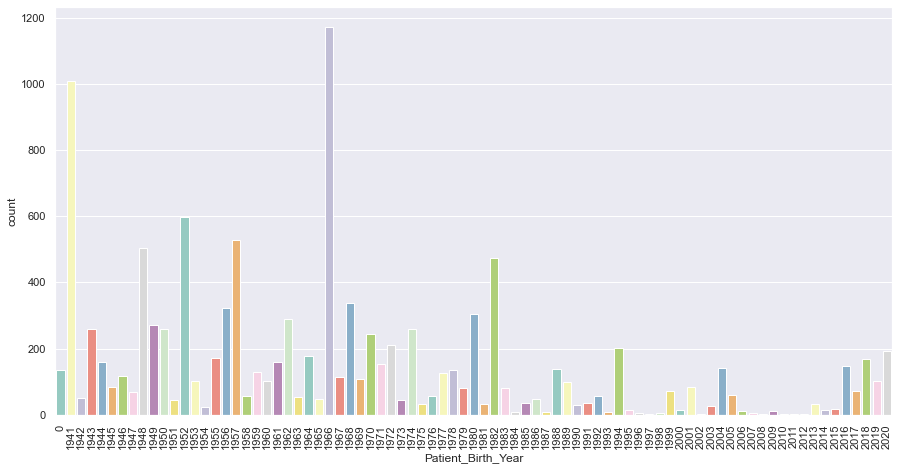

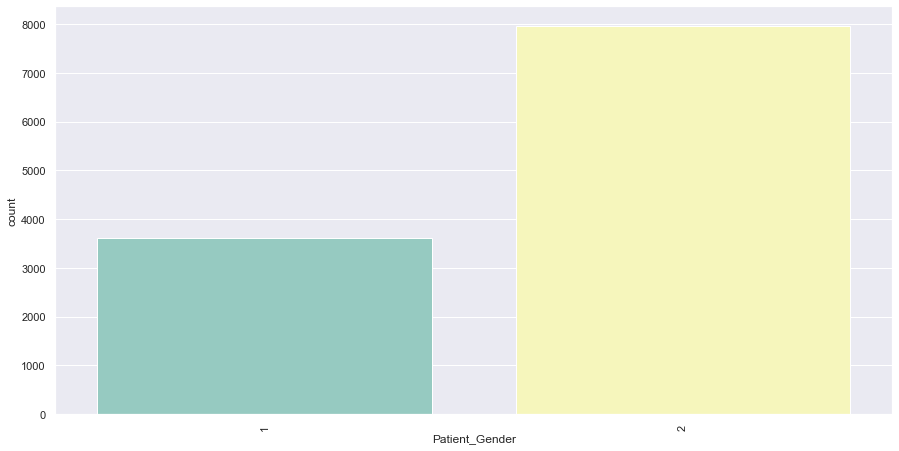

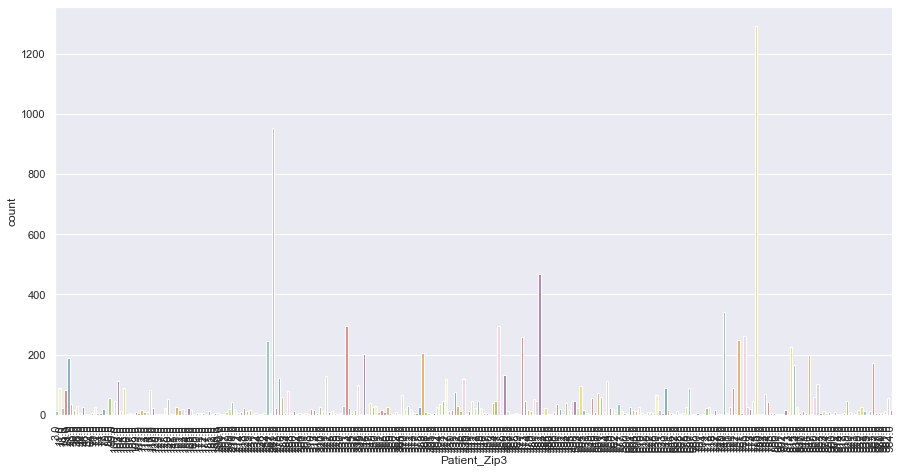

In [16]:
features = ['Patient_Id', 'Diagnosis_Code', 'Practitioner_Id', 'Claim_Id',
       'Practitioner_Role_Code', 'Service_Date', 'Npi', 'Specialty_Code',
       'Specialty_Description', 'Zip', 'Medical_Account_Zip_Code',
       'Patient_Birth_Year', 'Patient_Gender', 'Patient_Zip3']

for f in features:
    plt.figure(figsize = (15, 7.5))
    sns.countplot(x = f, data = SQL_Query, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation = 90)
    plt.show()

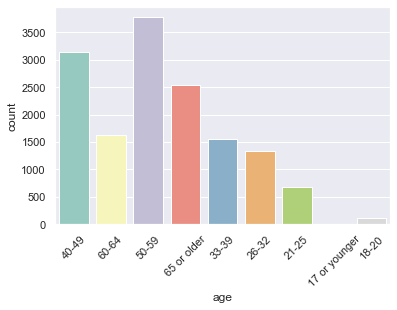

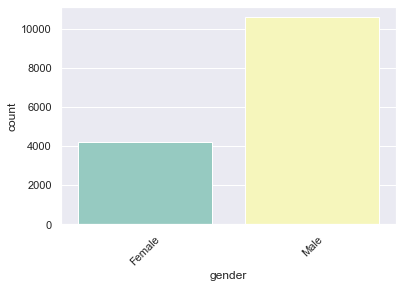

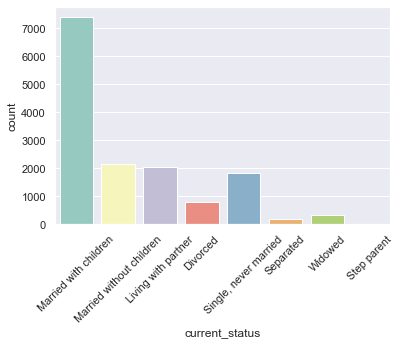

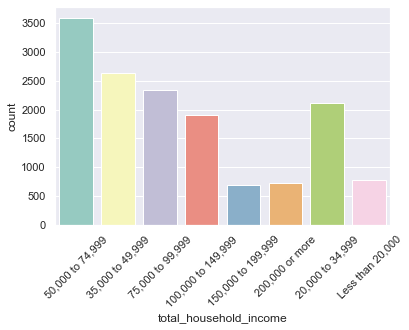

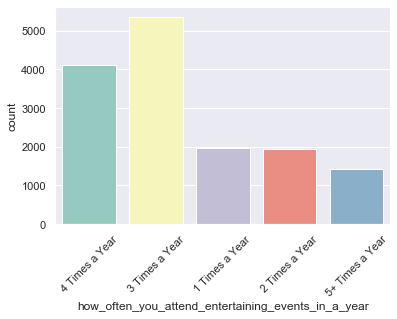

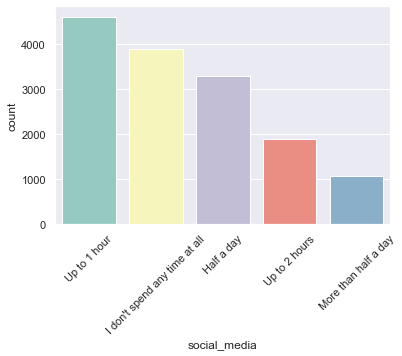

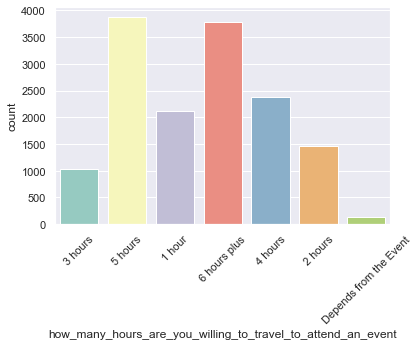

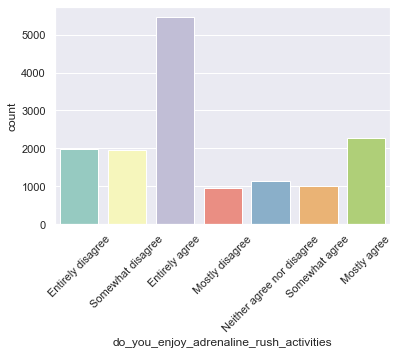

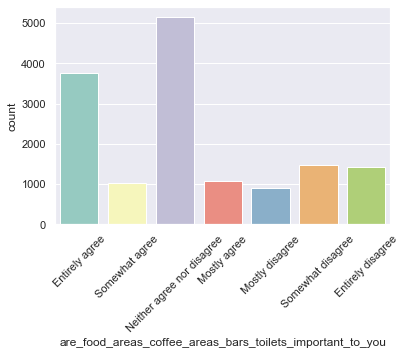

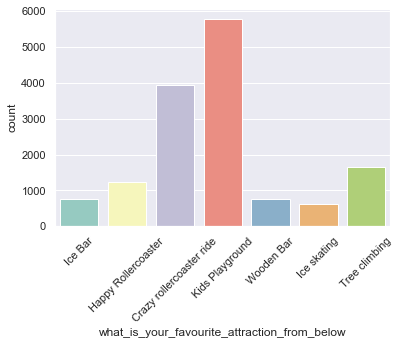

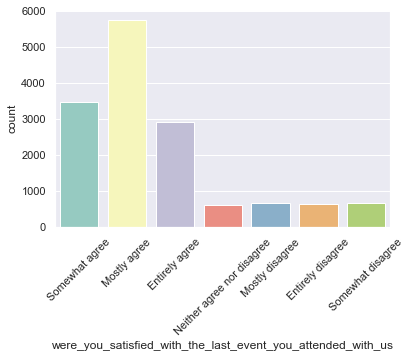

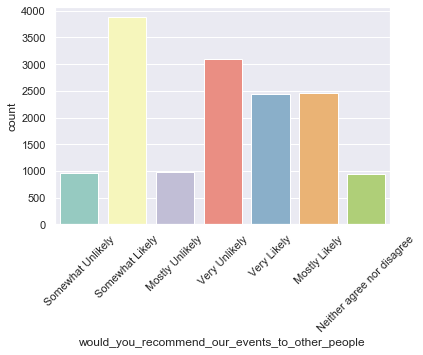

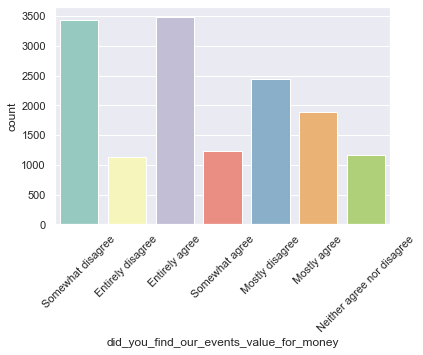

In [47]:
# Looping through all the features by our y variable - see if there is relationship

features = ['age', 'gender', 
       'current_status', 'total_household_income',
       'how_often_you_attend_entertaining_events_in_a_year', 'social_media',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event',
       'do_you_enjoy_adrenaline_rush_activities',
       'are_food_areas_coffee_areas_bars_toilets_important_to_you',
       'what_is_your_favourite_attraction_from_below','were_you_satisfied_with_the_last_event_you_attended_with_us',
       'would_you_recommend_our_events_to_other_people',
       'did_you_find_our_events_value_for_money']

for f in features:
    sns.countplot(x = f, data = SQL_Query, palette = 'Set3')# hue = 'Good Loan')
    plt.xticks(rotation=45)
    plt.show()
    


#### Feature Engineering - Creating a distance metric

#### Feature Engineering - Numeric Representation

In [58]:
# Making categorical variables into numeric representation
print(SQL_Query.shape)

# keeping the columns we need - Drop the location columns for now, as we do not want them to impact our results (for now)
raw_data = SQL_Query[features]
print(raw_data.shape)

# Making categorical variables into numeric representation
new_raw_data = pd.get_dummies(raw_data, columns = features)

# Notes: We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(new_raw_data.shape)
# print the shape

new_raw_data.head()

(14778, 22)
(14778, 13)
(14778, 86)


age_17 or younger  age_18-20  age_21-25  age_26-32  age_33-39  age_40-49  \
0                  0          0          0          0          0          1   
1                  0          0          0          0          0          0   
2                  0          0          0          0          0          0   
3                  0          0          0          0          0          0   
4                  0          0          0          0          0          0   

   age_50-59  age_60-64  age_65 or older  gender_Female  ...  \
0          0          0                0              1  ...   
1          0          1                0              0  ...   
2          1          0                0              0  ...   
3          1          0                0              1  ...   
4          0          1                0              0  ...   

   would_you_recommend_our_events_to_other_people_Somewhat Unlikely  \
0                                                  1                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   would_you_recommend_our_events_to_other_people_Very Likely  \
0                                                  0            
1                                                  0            
2                                                  0            
3                                                  0            
4                                                  0            

   would_you_recommend_our_events_to_other_people_Very Unlikely  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  1              

   did_you_find_our_events_value_for_money_Entirely agree  \
0                                                  0        
1                                                  0        
2                                                  0        
3                                                  0        
4                                                  1        

   did_you_find_our_events_value_for_money_Entirely disagree  \
0                                                  0           
1                                                  1           
2                                                  1           
3                                                  0           
4                                                  0           

   did_you_find_our_events_value_for_money_Mostly agree  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   did_you_find_our_events_value_for_money_Mostly disagree  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   did_you_find_our_events_value_for_money_Neither agree nor disagree  \
0                                                  0                    
1                                                  0                    
2                                                  0                    
3                                                  0                    
4                                                  0                    

   

In [59]:
raw_data.head()

age  gender            current_status total_household_income  \
0  40-49  Female     Married with children       50,000 to 74,999   
1  60-64    Male     Married with children       35,000 to 49,999   
2  50-59    Male     Married with children       75,000 to 99,999   
3  50-59  Female  Married without children       35,000 to 49,999   
4  60-64    Male     Married with children     100,000 to 149,999   

  how_often_you_attend_entertaining_events_in_a_year  \
0                                     4 Times a Year   
1                                     3 Times a Year   
2                                     3 Times a Year   
3                                     1 Times a Year   
4                                     3 Times a Year   

                    social_media  \
0                   Up to 1 hour   
1                   Up to 1 hour   
2  I don't spend any time at all   
3                     Half a day   
4                   Up to 1 hour   

  how_many_hours_are_you_willing_to_travel_to_attend_an_event  \
0                                            3 hours            
1                                            5 hours            
2                                            5 hours            
3                                             1 hour            
4                                       6 hours plus            

  do_you_enjoy_adrenaline_rush_activities  \
0                       Entirely disagree   
1                       Somewhat disagree   
2                       Somewhat disagree   
3                          Entirely agree   
4                         Mostly disagree   

  are_food_areas_coffee_areas_bars_toilets_important_to_you  \
0                                     Entirely agree          
1                                     Entirely agree          
2                                     Somewhat agree          
3                         Neither agree nor disagree          
4                         Neither agree nor disagree          

  what_is_your_favourite_attraction_from_below  \
0                                      Ice Bar   
1                          Happy Rollercoaster   
2                          Happy Rollercoaster   
3                     Crazy rollercoaster ride   
4                              Kids Playground   

  were_you_satisfied_with_the_last_event_you_attended_with_us  \
0                                     Somewhat agree            
1                                       Mostly agree            
2                                       Mostly agree            
3                                     Somewhat agree            
4                                     Entirely agree            

  would_you_recommend_our_events_to_other_people  \
0                              Somewhat Unlikely   
1                                Somewhat Likely   
2                                Mostly Unlikely   
3                                Somewhat Likely   
4                                  Very Unlikely   

  did_you_find_our_events_value_for_money  
0                       Somewhat disagree  
1                       Entirely disagree  
2                       Entirely disagree  
3                       Somewhat disagree  
4                          Entirely agree

## 6.0 K-means Clustering

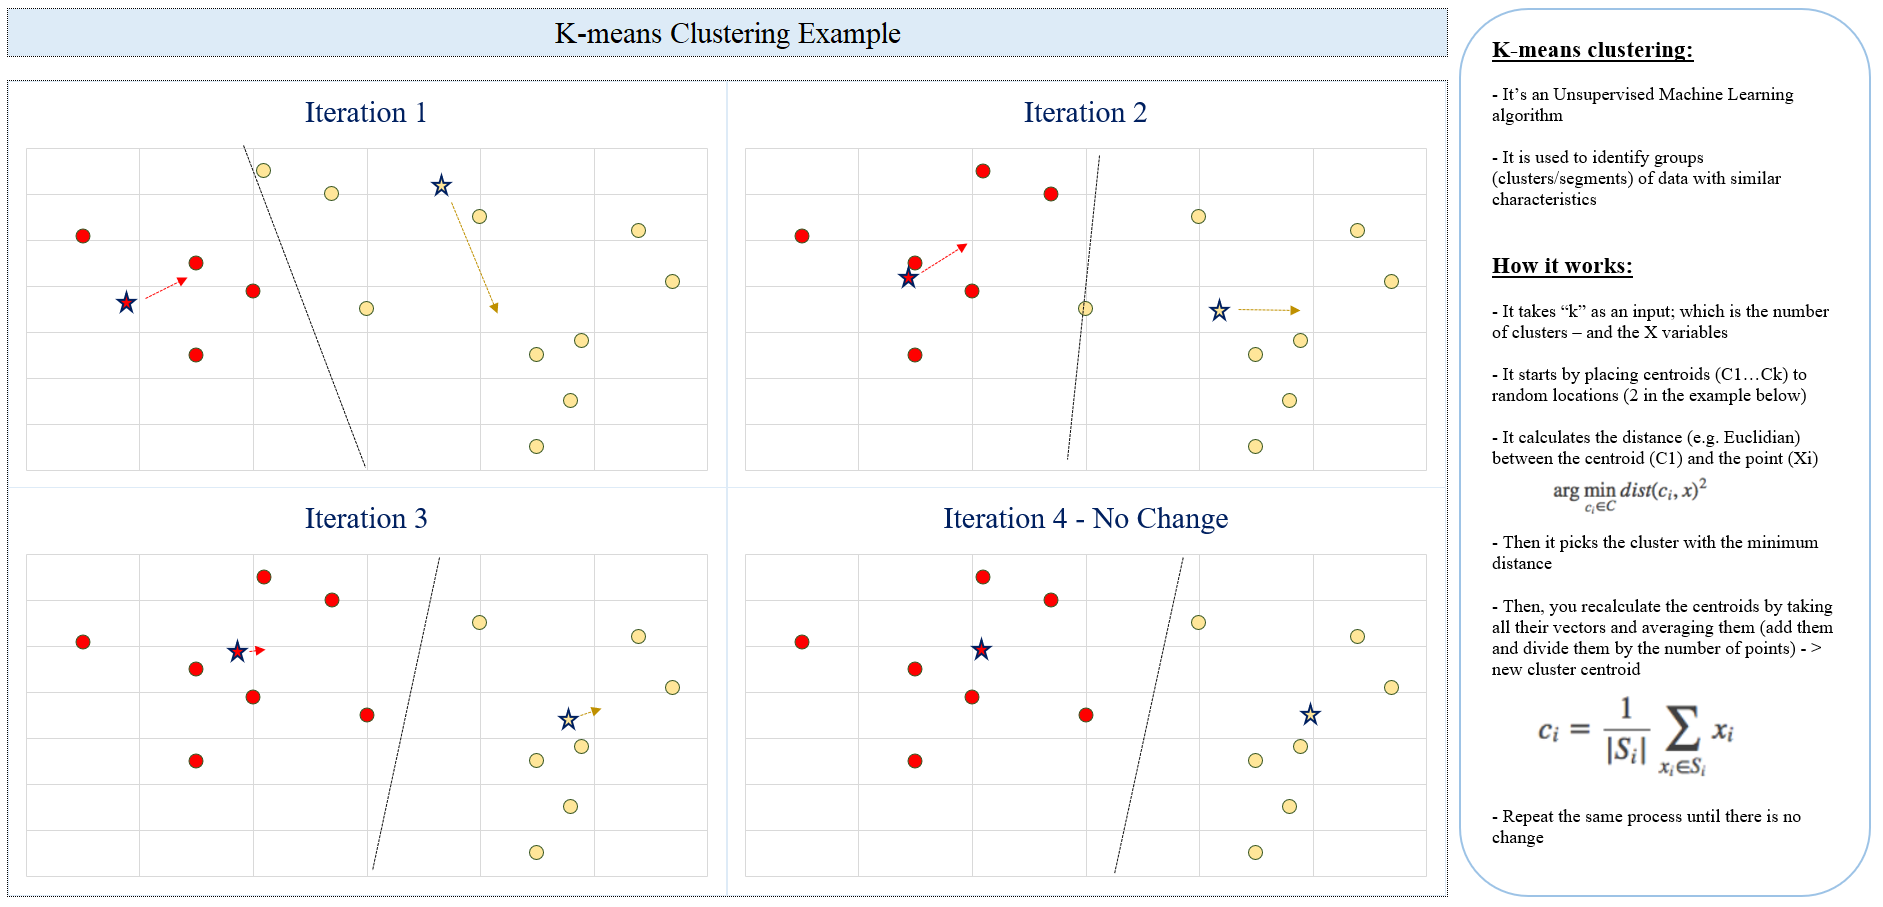

In [15]:
### Graphical - Supervised Vs Unsupervised Learning

PATH = "F:\\Github\\Python tutorials\\Introduction to ML - Unsupervised Learning\\"
Image(filename = PATH + "Kmeans.png", width=1000, height=1000)

In [16]:
# More details in how K-means works here: https://youtu.be/4b5d3muPQmA

In [62]:
# Running Kmeans

X_train = new_raw_data.values

# We wills start with 5 clusters

kmeans = KMeans(n_clusters=5, random_state=540)
kmeans = kmeans.fit(X_train)

# Prints the clusters it assigned to each observation
print("The clusters are: ", kmeans.labels_)

# Prints the Inertia
print("The Inertia is: ", kmeans.inertia_)


The clusters are:  [0 4 4 ... 0 1 4]
The Inertia is:  101900.25208839208


In [65]:
kmeans.labels_.shape

(14778,)

#### What is Inertia:
Inertia is the within-cluster sum of squares criterion. It is a metric that shows how internally coherent the clusters are. Inertia assumes that clusters are convex and isotropic; performs poorly elongated clusters, or manifolds with irregular shapes; better use hierarchical clustering here. Inertia also performs poorly in very high-dimensional spaces since Euclidean distances become inflated and no normalisation is applied beforehand; not a normalised metric.

In [72]:
# How to find the best number if Ks?

# Running K means with multible Ks

no_of_clusters = range(2,20) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

The innertia for : 2 Clusters is: 125619.02972065723
The innertia for : 3 Clusters is: 114905.38684266692
The innertia for : 4 Clusters is: 106337.17594801616
The innertia for : 5 Clusters is: 100865.1652923755
The innertia for : 6 Clusters is: 96432.51946729963
The innertia for : 7 Clusters is: 93814.48234646092
The innertia for : 8 Clusters is: 91696.5751387625
The innertia for : 9 Clusters is: 89724.9723040441
The innertia for : 10 Clusters is: 88493.21259624294
The innertia for : 11 Clusters is: 87581.06059954716
The innertia for : 12 Clusters is: 86617.666088801
The innertia for : 13 Clusters is: 85829.38420440158
The innertia for : 14 Clusters is: 85014.8527166815
The innertia for : 15 Clusters is: 84434.7438149334
The innertia for : 16 Clusters is: 83662.8356495057
The innertia for : 17 Clusters is: 82854.33711923643
The innertia for : 18 Clusters is: 82485.74994726635
The innertia for : 19 Clusters is: 82187.93372039594


In [17]:
no_of_clusters

NameError: name 'no_of_clusters' is not defined

Text(0.5, 1.0, 'Inertia Plot per k')

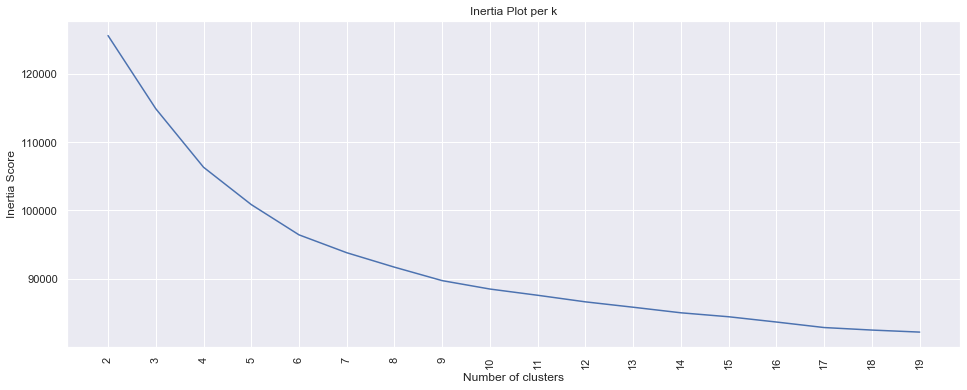

In [73]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [75]:
# Running K means on 5 clusters
kmeans = KMeans(n_clusters=5, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,5)

# Creating a datagrame
countscldf = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3","Cluster 4"])

# display
countscldf

Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4
0       2208       1226       8492       1865        987

# NEXT: TBC in Next Video